### Import the csv file of the stock which contained the Bollinger columns as well. Create a new column 'Call' , whose entries are - 'Buy' if the stock price is below the lower Bollinger band 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 'Short' if the stock price is above the upper Bollinger band Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each) Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os
os.chdir('D:/Datasets/')

df=pd.read_csv('LT.csv')
df['14 Day MA']=df['Close Price'].rolling(window=14).mean()
df['30 Day STD']=df['Close Price'].rolling(window=20).std()

df['Upper Band']=df['14 Day MA']+(df['30 Day STD']*2)
df['Lower Band']=df['14 Day MA']-abs(df['30 Day STD']*2)
df=df.dropna()
df['Mid Band']=(df['Upper Band']+df['Lower Band'])/2
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band
19,LT,EQ,09-Jun-2017,1774.25,1777.00,1783.90,1761.60,1779.80,1778.20,1773.47,1088138,1.929777e+09,44515,583696,53.64,1770.728571,29.120233,1828.969037,1712.488106,1770.728571
20,LT,EQ,12-Jun-2017,1778.20,1777.80,1778.00,1708.90,1743.00,1736.60,1732.36,2712638,4.699271e+09,98321,1530043,56.40,1770.432143,29.347323,1829.126790,1711.737496,1770.432143
21,LT,EQ,13-Jun-2017,1736.60,1744.55,1754.70,1736.55,1740.85,1739.00,1743.56,941516,1.641590e+09,57523,476292,50.59,1774.328571,29.411917,1833.152405,1715.504737,1774.328571
22,LT,EQ,14-Jun-2017,1739.00,1742.00,1771.35,1734.80,1759.00,1764.45,1755.83,1386438,2.434354e+09,61835,667755,48.16,1774.014286,29.391094,1832.796473,1715.232098,1774.014286
23,LT,EQ,15-Jun-2017,1764.45,1757.15,1761.90,1730.00,1735.00,1735.35,1739.34,987395,1.717416e+09,50173,491047,49.73,1770.282143,28.632154,1827.546451,1713.017835,1770.282143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,LT,EQ,07-May-2019,1352.70,1357.40,1374.35,1350.00,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55,1359.460714,9.596261,1378.653237,1340.268192,1359.460714
490,LT,EQ,08-May-2019,1366.60,1363.90,1371.00,1355.00,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87,1359.421429,9.547306,1378.516041,1340.326816,1359.421429
491,LT,EQ,09-May-2019,1360.35,1357.00,1368.80,1337.60,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30,1359.389286,9.323870,1378.037025,1340.741546,1359.389286
492,LT,EQ,10-May-2019,1356.45,1359.65,1362.50,1345.10,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89,1357.539286,9.048691,1375.636668,1339.441903,1357.539286


In [2]:
def select_buy(df):
    if df['Close Price']<df['Lower Band']:
        return 'Buy'
    if df['Close Price']>df['Lower Band'] and df['Close Price']<df['Mid Band']:
        return 'Hold Buy/ Liquidate Short'
    if df['Close Price']>df['Mid Band'] and df['Close Price']<df['Upper Band']:
        return 'Hold Short/ Liquidate Buy'
    if df['Close Price']>df['Upper Band']:
        return 'Short'

df=df.assign(Call=df.apply(select_buy,axis=1))
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band,Call
19,LT,EQ,09-Jun-2017,1774.25,1777.00,1783.90,1761.60,1779.80,1778.20,1773.47,...,1.929777e+09,44515,583696,53.64,1770.728571,29.120233,1828.969037,1712.488106,1770.728571,Hold Short/ Liquidate Buy
20,LT,EQ,12-Jun-2017,1778.20,1777.80,1778.00,1708.90,1743.00,1736.60,1732.36,...,4.699271e+09,98321,1530043,56.40,1770.432143,29.347323,1829.126790,1711.737496,1770.432143,Hold Buy/ Liquidate Short
21,LT,EQ,13-Jun-2017,1736.60,1744.55,1754.70,1736.55,1740.85,1739.00,1743.56,...,1.641590e+09,57523,476292,50.59,1774.328571,29.411917,1833.152405,1715.504737,1774.328571,Hold Buy/ Liquidate Short
22,LT,EQ,14-Jun-2017,1739.00,1742.00,1771.35,1734.80,1759.00,1764.45,1755.83,...,2.434354e+09,61835,667755,48.16,1774.014286,29.391094,1832.796473,1715.232098,1774.014286,Hold Buy/ Liquidate Short
23,LT,EQ,15-Jun-2017,1764.45,1757.15,1761.90,1730.00,1735.00,1735.35,1739.34,...,1.717416e+09,50173,491047,49.73,1770.282143,28.632154,1827.546451,1713.017835,1770.282143,Hold Buy/ Liquidate Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,LT,EQ,07-May-2019,1352.70,1357.40,1374.35,1350.00,1368.50,1366.60,1366.49,...,3.547930e+09,80814,1727865,66.55,1359.460714,9.596261,1378.653237,1340.268192,1359.460714,Hold Short/ Liquidate Buy
490,LT,EQ,08-May-2019,1366.60,1363.90,1371.00,1355.00,1362.00,1360.35,1364.13,...,2.184919e+09,77662,910828,56.87,1359.421429,9.547306,1378.516041,1340.326816,1359.421429,Hold Short/ Liquidate Buy
491,LT,EQ,09-May-2019,1360.35,1357.00,1368.80,1337.60,1356.00,1356.45,1356.59,...,3.343208e+09,97052,1560086,63.30,1359.389286,9.323870,1378.037025,1340.741546,1359.389286,Hold Buy/ Liquidate Short
492,LT,EQ,10-May-2019,1356.45,1359.65,1362.50,1345.10,1356.65,1355.50,1354.49,...,1.985897e+09,69058,716794,48.89,1357.539286,9.048691,1375.636668,1339.441903,1357.539286,Hold Buy/ Liquidate Short


In [3]:
x=df[['Upper Band','Lower Band','Mid Band','Close Price']]

df['Call']=df['Call'].map({
    'Buy':0,
    'Hold Buy/ Liquidate Short':1,
    'Hold Short/ Liquidate Buy':2,
    'Short':4,
})
y=df['Call']

In [4]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=96)

### Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0)
LR.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
train_predict=LR.predict(train_x)
test_predict=LR.predict(test_x)


from sklearn.metrics import f1_score
print('Training Error : ',f1_score(train_predict,train_y,average='weighted'))
print('Testing Error : ',f1_score(test_predict,test_y,average='weighted'))

Training Error :  0.9971902386208448
Testing Error :  0.9831932773109243


### Support Vector Machine 

In [7]:
from sklearn import svm
clf=svm.SVC(decision_function_shape='ovr',break_ties=True)
clf.fit(train_x,train_y)

SVC(C=1.0, break_ties=True, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
train_predict=clf.predict(train_x)
test_predict=clf.predict(test_x)
print('Training Score : ',f1_score(train_predict,train_y,average='weighted'))
print('Testing Score : ',f1_score(test_predict,test_y,average='weighted'))

Training Score :  0.8736345956340706
Testing Score :  0.9183179903261038


### Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100,max_depth=2,random_state=96)
RF.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=96, verbose=0,
                       warm_start=False)

In [10]:
train_predict=RF.predict(train_x)
test_predict=RF.predict(test_x)
print('Training Error : ',f1_score(train_predict,train_y,average='weighted'))
print('Testing Error : ',f1_score(test_predict,test_y,average='weighted'))

Training Error :  0.8114631497408622
Testing Error :  0.8070910182254719


In [11]:
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
NN.fit(train_x,train_y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [12]:
train_predict=NN.predict(train_x)
test_predictt=NN.predict(test_x)
print('Training Error : ',f1_score(train_predict,train_y,average='weighted'))
print('Testing Error : ',f1_score(test_predict,test_y,average='weighted'))

Training Error :  0.6666666666666666
Testing Error :  0.8070910182254719


### Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier. Import the stock data file of your choice Define 4 new columns , whose values are: % change between Open and Close price for the day % change between Low and High price for the day 5 day rolling mean of the day to day % change in Close Price 5 day rolling std of the day to day % change in Close Price Create a new column 'Action' whose values are: 1 if next day's price(Close) is greater than present day's. (-1) if next day's price(Close) is less than present day's. i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ] Construct a classification model with the 4 new inputs and 'Action' as target Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [13]:
import pandas as pd 
lt=pd.read_csv('LT.csv')
lt

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,LT,EQ,15-May-2017,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
1,LT,EQ,16-May-2017,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2,LT,EQ,17-May-2017,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
3,LT,EQ,18-May-2017,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
4,LT,EQ,19-May-2017,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,LT,EQ,07-May-2019,1352.70,1357.40,1374.35,1350.00,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55
490,LT,EQ,08-May-2019,1366.60,1363.90,1371.00,1355.00,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87
491,LT,EQ,09-May-2019,1360.35,1357.00,1368.80,1337.60,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30
492,LT,EQ,10-May-2019,1356.45,1359.65,1362.50,1345.10,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89


In [14]:
lt['%chg_op_cl']=((lt['Close Price']-lt['Open Price'])/(lt['Close Price']))*100

lt['%chg_lw_hg']=((lt['Low Price']-lt['High Price'])/(lt['Low Price']))*100

lt['%chg_5dmean']=lt['Close Price'].pct_change().dropna().rolling(5).mean()

lt['%chg_5dstd']=lt['Close Price'].pct_change().dropna().rolling(5).std()

lt=lt.dropna()
lt

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg_op_cl,%chg_lw_hg,%chg_5dmean,%chg_5dstd
5,LT,EQ,22-May-2017,1724.55,1733.00,1759.00,1729.00,1753.00,1751.95,1749.85,1892816,3.312148e+09,81450,1222100,64.57,1.081652,-1.735107,0.001161,0.012941
6,LT,EQ,23-May-2017,1751.95,1755.00,1764.90,1727.40,1735.50,1740.75,1744.75,975870,1.702648e+09,54639,431247,44.19,-0.818613,-2.170893,0.000078,0.013384
7,LT,EQ,24-May-2017,1740.75,1742.10,1756.90,1677.60,1689.45,1684.45,1721.17,1448713,2.493487e+09,50761,754200,52.06,-3.422482,-4.726991,-0.008086,0.018466
8,LT,EQ,25-May-2017,1684.45,1692.00,1775.00,1692.00,1765.00,1768.85,1753.44,3603181,6.317948e+09,95146,2346405,65.12,4.344631,-4.905437,0.005678,0.030373
9,LT,EQ,26-May-2017,1768.85,1770.00,1799.00,1753.85,1784.10,1787.60,1779.89,2044054,3.638199e+09,71833,995635,48.71,0.984560,-2.574336,0.007572,0.030313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,LT,EQ,07-May-2019,1352.70,1357.40,1374.35,1350.00,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55,0.673204,-1.803704,0.001262,0.008396
490,LT,EQ,08-May-2019,1366.60,1363.90,1371.00,1355.00,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87,-0.260962,-1.180812,0.001768,0.007822
491,LT,EQ,09-May-2019,1360.35,1357.00,1368.80,1337.60,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30,-0.040547,-2.332536,-0.000318,0.007260
492,LT,EQ,10-May-2019,1356.45,1359.65,1362.50,1345.10,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89,-0.306160,-1.293584,-0.001172,0.006933


In [15]:
arr=[]
val=[]
for value in lt['Close Price'].iteritems():
    arr.append(value[1])
for i in range(0,483):
    if arr[i+1]>arr[i]:
        val.append(1)
    else:
        val.append(-1)
lt['Action']=pd.DataFrame(val)
lt=lt.dropna()
lt

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg_op_cl,%chg_lw_hg,%chg_5dmean,%chg_5dstd,Action
5,LT,EQ,22-May-2017,1724.55,1733.0,1759.00,1729.00,1753.00,1751.95,1749.85,1892816,3.312148e+09,81450,1222100,64.57,1.081652,-1.735107,0.001161,0.012941,-1.0
6,LT,EQ,23-May-2017,1751.95,1755.0,1764.90,1727.40,1735.50,1740.75,1744.75,975870,1.702648e+09,54639,431247,44.19,-0.818613,-2.170893,0.000078,0.013384,-1.0
7,LT,EQ,24-May-2017,1740.75,1742.1,1756.90,1677.60,1689.45,1684.45,1721.17,1448713,2.493487e+09,50761,754200,52.06,-3.422482,-4.726991,-0.008086,0.018466,1.0
8,LT,EQ,25-May-2017,1684.45,1692.0,1775.00,1692.00,1765.00,1768.85,1753.44,3603181,6.317948e+09,95146,2346405,65.12,4.344631,-4.905437,0.005678,0.030373,-1.0
9,LT,EQ,26-May-2017,1768.85,1770.0,1799.00,1753.85,1784.10,1787.60,1779.89,2044054,3.638199e+09,71833,995635,48.71,0.984560,-2.574336,0.007572,0.030313,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,LT,EQ,16-Apr-2019,1356.90,1360.0,1390.90,1360.00,1380.50,1381.40,1382.54,3217456,4.448249e+09,103189,1733815,53.89,1.549153,-2.272059,0.000951,0.011328,1.0
479,LT,EQ,18-Apr-2019,1381.40,1387.0,1387.60,1357.40,1362.50,1360.70,1365.60,2594906,3.543601e+09,92393,1644823,63.39,-1.932829,-2.224842,-0.001515,0.013452,-1.0
480,LT,EQ,22-Apr-2019,1360.70,1362.0,1370.90,1352.50,1356.65,1360.15,1363.20,3101477,4.227922e+09,96390,2082887,67.16,-0.136014,-1.360444,-0.002536,0.013050,1.0
481,LT,EQ,23-Apr-2019,1360.15,1361.7,1365.00,1336.60,1347.45,1348.20,1349.94,2016454,2.722099e+09,83871,1102625,54.68,-1.001335,-2.124794,-0.001812,0.012451,1.0


In [16]:
x=lt[['%chg_op_cl','%chg_lw_hg','%chg_5dmean','%chg_5dstd']]
y=lt['Action']

In [20]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=96)

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=96,max_depth=2,n_estimators=100)
RF.fit(train_x,train_y)

train_predict=RF.predict(train_x)
test_predict=RF.predict(test_x)
print('Training Error : ',f1_score(train_predict,train_y))
print('Testing Error : ',f1_score(test_predict,test_y))

Training Error :  0.5057471264367815
Testing Error :  0.3333333333333333


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


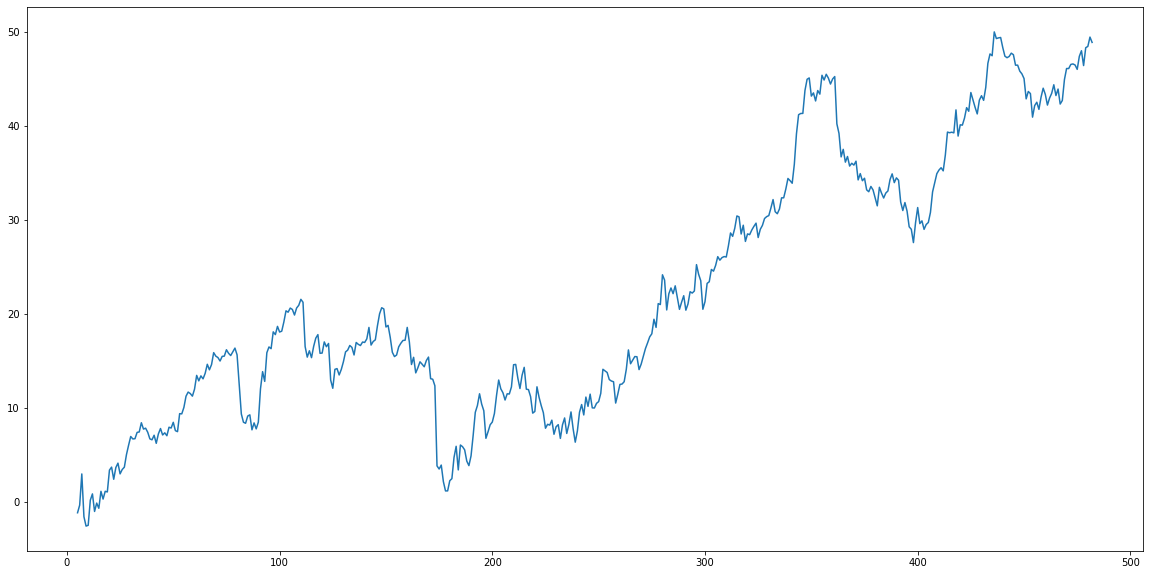

In [24]:
lt['Net_Cumulative_Returns']=(((lt['Open Price']-lt['Close Price'])/(lt['Open Price']))*100).cumsum()

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(lt['Net_Cumulative_Returns'])